### Inverse design of Nanobeam cavity

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import tidy3d as td
from tidy3d.plugins.resonance import ResonanceFinder

from Devices import NanobeamSimulation
from tidy3d_utilities import FDTD_utilities
from Optimize_designs import Optimize

utilities = FDTD_utilities()

In [10]:
td.config.logging_level = "ERROR"
alattice = 0.23
freq_range = np.linspace(0.1, 0.5, 1000) * td.C_0 / alattice
wavelength_range = (td.C_0 / freq_range)[::-1]

nanobeam_design_options = {
    "alattice": alattice,
    "slab_dimentions": [8, 0.26, 0.19],
    "radius_ratio": 0.33,
    "wavelength_range": wavelength_range,
}

nanobeam = NanobeamSimulation(wavelength_in_at="950",
                              **nanobeam_design_options)

# Define bloch boundary spec: kx = np.linspace(0, 0.5, Nk)*alattice/(2*pi)
# td.Boundary.bloch() accepts bloch_vec in units of 2*pi/(size along dimension)
kx = np.linspace(0.1, 0.5, 21)

batch_data = nanobeam.bandstructure(kx=kx, run_time=15e-12, FieldMonitor_bool=False)

Output()

00:58:29 Eastern Standard Time Started working on Batch containing 21 tasks.

00:58:55 Eastern Standard Time Maximum FlexCredit cost: 0.525 for the whole     
                               batch.

                               Use 'Batch.real_cost()' to get the billed        
                               FlexCredit cost after the Batch has completed.

Output()

01:01:24 Eastern Standard Time Batch complete.

Output()

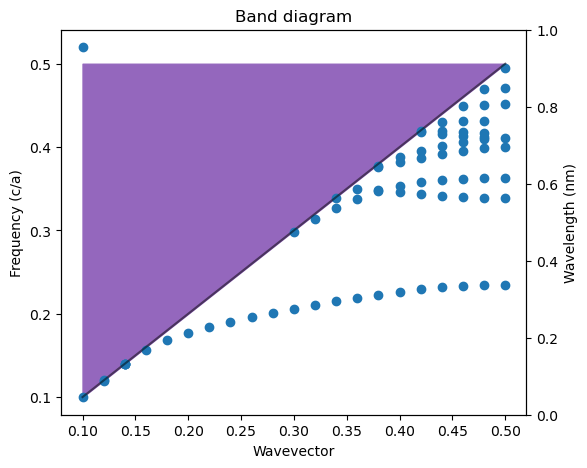

In [49]:
def filter_resonances(resonance_data, minQ, minamp, maxerr):
    resonance_data = resonance_data.where(abs(resonance_data.Q) > minQ, drop=True)
    resonance_data = resonance_data.where(resonance_data.amplitude > minamp, drop=True)
    resonance_data = resonance_data.where(resonance_data.error < maxerr, drop=True)
    return resonance_data

# Plot the light line
fig, ax = plt.subplots(figsize=(6, 5))
ax2 = ax.twinx()
lightx = np.linspace(kx[0], kx[-1], 100)
lighty = lightx
ax.plot(lightx, lighty, color="k", alpha=0.5)
ax.fill_between(lightx, lighty, y2=0.5, color="tab:purple")

# Analyze time monitors from the batch_data and plot
resonance_finder = ResonanceFinder(freq_window=(freq_range[0], freq_range[-1]))

resonance_freq_array = []
resonance_data_array = []
for i in range(len(kx)):
    sim_data = batch_data[f"sim_{i}"]
    resonance_data = resonance_finder.run(signals=sim_data.data)
    resonance_data_array.append(resonance_data)
    resonance_data = filter_resonances(resonance_data=resonance_data,
                                        minQ=500,
                                        minamp=0.001,
                                        maxerr=0.05)
    resonance_freqs = resonance_data.freq.to_numpy()
    resonance_freq_array.append(resonance_freqs)
    ax.scatter(
        np.full(len(resonance_freqs), kx[i]),
        resonance_freqs * alattice / 3e14,
        color="tab:blue",
    )

# ax.set_xlim(freq_range[0], freq_range[-1])
# ax.set_ylim(freq_range[0], freq_range[-1])
ax2.set_ylabel("Wavelength (nm)")
ax.set_title("Band diagram")
ax.set_ylabel("Frequency (c/a)")
ax.set_xlabel("Wavevector")

plt.show()

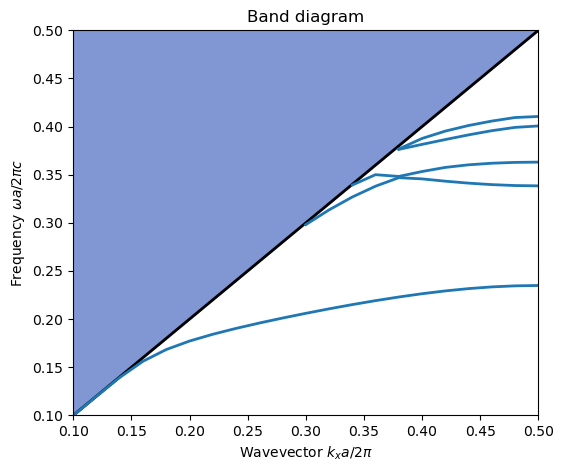

In [145]:
# Plot the light line
fig, ax = plt.subplots(figsize=(6, 5))
# ax2 = ax.twinx()
lightx = np.linspace(0.09, 0.51, 100)
lighty = lightx
ax.plot(lightx, lighty, color="k", alpha=1, lw = 2)
ax.fill_between(lightx, lighty, y2=0.51, color="#8197d3")

temp = np.full((len(kx), 20), None)

for i in range(len(kx)):
    # resonance_freq = resonance_data_array[i].freq.to_numpy()
    temp[i, :len(resonance_freq_array[i])] = resonance_freq_array[i]*alattice/3e14
    # ax.scatter(
    #     np.full(len(resonance_freq_array[i]), kx[i]),
    #     resonance_freq_array[i] * alattice / 3e14,
    #     color="tab:blue",
    # )
    # ax2.scatter(
    #     np.full(len(resonance_freq), kx[i]),
    #     td.C_0/resonance_freq/0.23*3e14,
    #     color="tab:blue",
    # )
ax.plot(kx, temp[:, 0], color = "tab:blue", lw = 2)
ax.plot(kx[2:], temp[2:, 1], color = "tab:blue", lw = 2)
ax.plot(kx, temp[:, 2], color = "tab:blue", lw = 2)
ax.plot(kx, temp[:, 3], color = "tab:blue", lw = 2)
ax.plot(kx, temp[:, 4], color = "tab:blue", lw = 2)
# ax.plot(kx, temp[:, 5], color = "tab:blue")
# ax.plot(kx, temp[:, 6], color = "tab:blue")
# ax.plot(kx, temp[:, 7], color = "tab:blue")
# ax.plot(kx, temp[:, 8], color = "tab:blue")
# ax.plot(kx, temp[:, 9], color = "tab:blue")
    
# ax2.invert_yaxis()

ax.set_xlim(0.1, 0.5)
ax.set_ylim(0.1, 0.5)
# ax2.set_ylabel("Wavelength (nm)")
ax.set_title("Band diagram")
ax.set_ylabel("Frequency $\omega a/2 \pi c$")
ax.set_xlabel("Wavevector $k_x a/2 \pi$")

plt.savefig("bandstructure_nanobeam.png", dpi = 600)
plt.savefig("bandstructure_nanobeam.svg", dpi = 600)
plt.show()

In [62]:
np.full(len(resonance_freq_array[0]), kx[0])

array([0.1, 0.1])

In [ ]:
temp = np.zeros((12))

array([2.99031858e+14, 4.47730400e+14, 4.66393819e+14, 5.04156934e+14,
       5.15598792e+14, 5.45691578e+14, 5.46132924e+14])

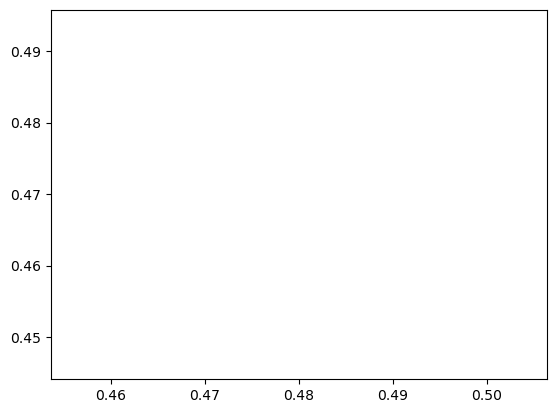

In [112]:
plt.plot(kx, temp[:, 9])